### （３章　続き）

#### 多層パーセプトロン
XORゲートをパーセプトロンによって再現することを考える。  
パーセプトロンの入出力は次の通り。

$x_{1}$|$x_{2}$|y
-:-|-:-|-:-
0|0|0
0|1|1
1|0|1
1|1|0

これは線形分離不可能であり、一層パーセプトロンでは再現できない。  
例として、次のように分類を試みると失敗する。  

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

np.random.seed(0)

X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0],[1],[1],[0]])

model = Sequential([
    #Dense(input_dim=2, output_dim=1),
    Dense(units=1, input_dim=2), # keras v2.0へのアップデートに伴う変更
    Activation('sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
model.fit(X,Y, epochs=200, batch_size=1)

prob = model.predict_proba(X, batch_size=1)
print(prob)

Epoch 1/200
4/4 [==============================] - 0s - loss: 0.8427     
Epoch 2/200
4/4 [==============================] - 0s - loss: 0.8205     
Epoch 3/200
4/4 [==============================] - 0s - loss: 0.8049     
Epoch 4/200
4/4 [==============================] - 0s - loss: 0.7924     
Epoch 5/200
4/4 [==============================] - 0s - loss: 0.7822     
Epoch 6/200
4/4 [==============================] - 0s - loss: 0.7754     
Epoch 7/200
4/4 [==============================] - 0s - loss: 0.7688     
Epoch 8/200
4/4 [==============================] - 0s - loss: 0.7622     
Epoch 9/200
4/4 [==============================] - 0s - loss: 0.7578     
Epoch 10/200
4/4 [==============================] - 0s - loss: 0.7555     
Epoch 11/200
4/4 [==============================] - 0s - loss: 0.7520     
Epoch 12/200
4/4 [==============================] - 0s - loss: 0.7497     
Epoch 13/200
4/4 [==============================] - 0s - loss: 0.7468     
Epoch 14/200
4/4 [================

パーセプトロンの多層化によりXORゲートを実現することを考える。  
XORゲートの入出力表は次の通り。
  
$x_{1}$|$x_{2}$||$y$
-:-|-:-||-:-
0|0||0
0|1||1
1|0||1
1|1||0

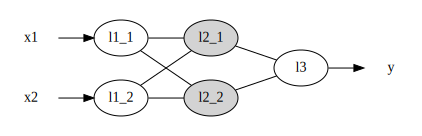

In [1]:
from graphviz import Digraph

dot = Digraph()
dot.node_attr['arrowhead']='none'
dot.graph_attr['rankdir']='LR'

with dot.subgraph(name='cluster_0', graph_attr={'style': 'invis'}) as c0:
    c0.node('x1','x1', shape='plaintext')
    c0.edge('x1', 'l1_1')
    c0.node('l2_1', 'l2_1', style='filled')
    c0.edge('l1_1', 'l2_1', arrowhead='none')
    
with dot.subgraph(name='cluster_1', graph_attr={'style': 'invis'}) as c1:
    c1.node('x2','x2', shape='plaintext')
    c1.edge('x2', 'l1_2')
    c1.node('l2_2', 'l2_2', style='filled')
    c1.edge('l1_2', 'l2_2', arrowhead='none')

dot.edge('l1_1','l2_2', arrowhead='none')
dot.edge('l1_2','l2_1', arrowhead='none')
dot.edge('l2_1','l3', arrowhead='none')
dot.edge('l2_2','l3', arrowhead='none')
dot.node('y','y', shape='plaintext')
dot.edge('l3','y')

dot.body.append('{rank=min; x1; x2;}')
dot


１層パーセプトロンに上記のような隠れ層（図中では灰色のノードが属する）を追加し、  
入力 $X=(x_{1}, x_{2})^{\mathrm{T}}$ に対して以下の式により出力 $y$ を返す。  
  
\begin{align*}
h_{1} &= f(w_{11}x_{1} +w_{12}x_{2} + b_{1}) \\
h_{2} &= f(w_{21}x_{1} +w_{22}x_{2} + b_{2}) \\
y &= f(v_{1}h_{1} + v_{2}h_{2} + c)
\end{align*}

ここで $f()$ はステップ関数、  
$V=(v_{1}, v_{2})^{\mathrm{T}}, \, c$ は隠れ層から出力層への重みベクトルおよびバイアスである。    
  
このとき、例えば以下のようなパラメータはXORゲートとして正しい出力を与える。  

\begin{align*}
W&=\left( \begin{array}{cc}
w_{11}& w_{12}\\
w_{21}& w_{22}
\end{array}
\right) = \left( \begin{array}{cc}
2& 2\\
-2& -2
\end{array} \right) \\
b&=\left( \begin{array}{c}
b_{1}\\
b_{2}
\end{array}
\right) = \left( \begin{array}{c}
-1\\
3
\end{array}
\right) \\
V&=\left( \begin{array}{c}
v_{1}\\
v_{2}
\end{array}
\right) = \left( \begin{array}{c}
2\\
2
\end{array}
\right) \\
c &= -3
\end{align*}

$x_{1}$ | $x_{2}$ | $h_{1}$ | $h_{2}$ | $v_{1}h_{1} + v_{2}h_{2}+c$ || $y$
-:-|-:-|-:-|-:-|-:-||-:-
0|0|-1|1|-3||-1
0|1|1|1|1||1
1|0|1|1|1||1
1|1|1|-1|-3||-1
